In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import statsmodels as sm

pd.set_option('display.max_rows',60000)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_colwidth',200)
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
tesla_ticker = yf.Ticker ('TSLA')
tesla_frame = tesla_ticker.history(start="2023-01-01", end="2023-06-14")
tesla_df = tesla_frame[['Close']].copy()
tesla_df = tesla_df.rename(columns = {'Close':'observed'})

In [3]:
tesla_df.head()

,observed
Date,
2023-01-03 00:00:00-05:00,108.10
2023-01-04 00:00:00-05:00,113.64
2023-01-05 00:00:00-05:00,110.34
2023-01-06 00:00:00-05:00,113.06
2023-01-09 00:00:00-05:00,119.77


In [4]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2023-01-03 00:00:00-05:00 to 2023-06-13 00:00:00-04:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   observed  112 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


In [5]:
tesla_df.index #freq=None ??? 

DatetimeIndex(['2023-01-03 00:00:00-05:00', '2023-01-04 00:00:00-05:00',
               '2023-01-05 00:00:00-05:00', '2023-01-06 00:00:00-05:00',
               '2023-01-09 00:00:00-05:00', '2023-01-10 00:00:00-05:00',
               '2023-01-11 00:00:00-05:00', '2023-01-12 00:00:00-05:00',
               '2023-01-13 00:00:00-05:00', '2023-01-17 00:00:00-05:00',
               ...
               '2023-05-31 00:00:00-04:00', '2023-06-01 00:00:00-04:00',
               '2023-06-02 00:00:00-04:00', '2023-06-05 00:00:00-04:00',
               '2023-06-06 00:00:00-04:00', '2023-06-07 00:00:00-04:00',
               '2023-06-08 00:00:00-04:00', '2023-06-09 00:00:00-04:00',
               '2023-06-12 00:00:00-04:00', '2023-06-13 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=112, freq=None)

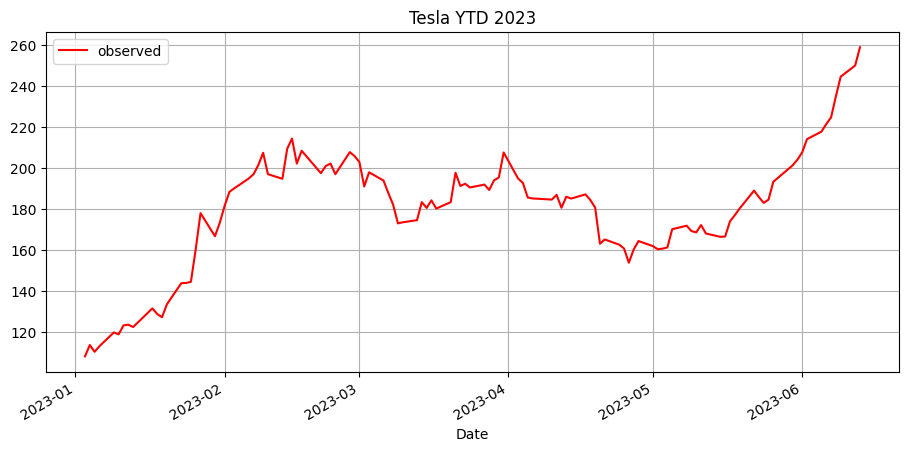

In [6]:
tesla_df.plot(c='r', grid=True, figsize= (11,5) )
plt.title('Tesla YTD 2023');

# Stationarity 

In [7]:
t1 = tesla_df.copy()
t1['diff'] = t1['observed'].diff(1) #pls dun shift then minus ... it is stupid 
t1 = t1.dropna(axis=0)

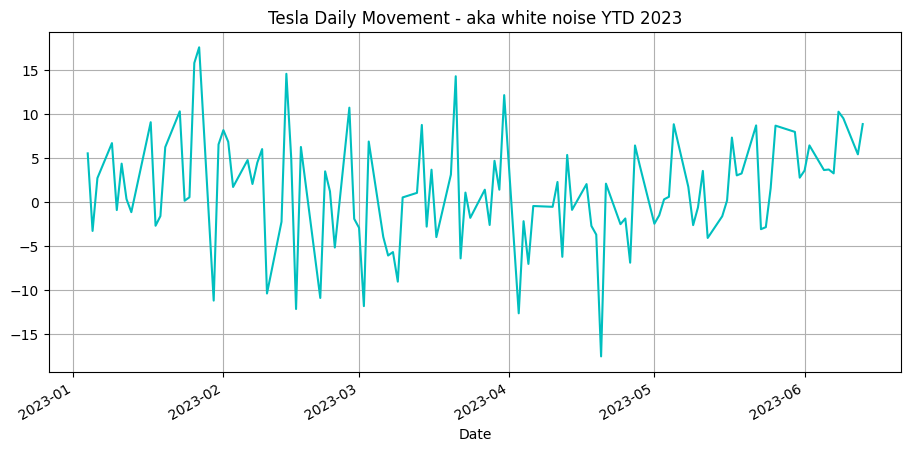

In [8]:
t1['diff'].plot(c='c', grid=True, figsize= (11,5)); #white noise
plt.title('Tesla Daily Movement - aka white noise YTD 2023');

In [9]:
t1.describe()

,observed,diff
count,111.00,111.00
mean,180.27,1.36
std,28.53,6.33
min,110.34,-17.60
25%,166.44,-2.57
50%,184.47,1.40
75%,196.85,5.49
max,258.71,17.63


In [10]:
from scipy.stats import zscore

In [11]:
zscore(t1['diff']).describe()

count   111.00
mean      0.00
std       1.00
min      -3.01
25%      -0.62
50%       0.01
75%       0.65
max       2.58
Name: diff, dtype: float64

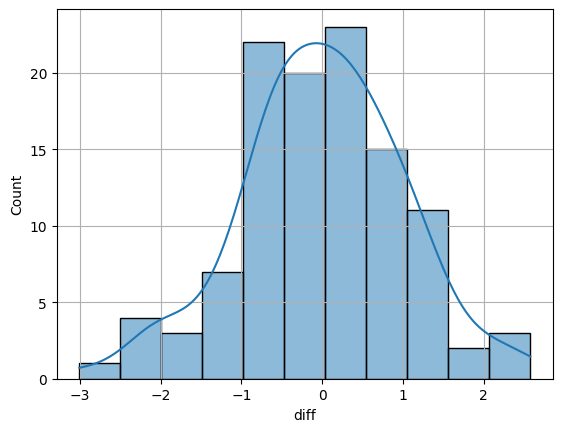

In [12]:
sns.histplot(zscore(t1['diff']), kde=True,);
plt.grid()

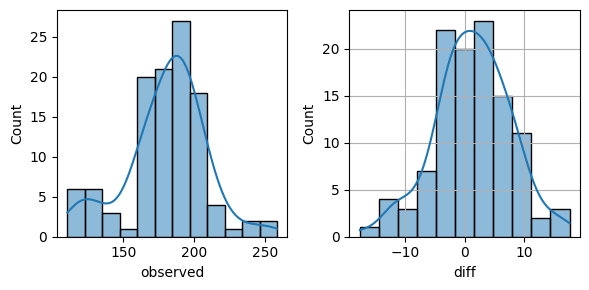

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
sns.histplot(t1['observed'], ax=axes[0], kde = True)
sns.histplot(t1['diff'], ax=axes[1],kde = True)
fig.tight_layout()
plt.grid()

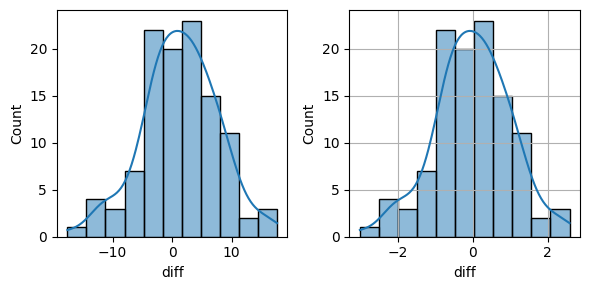

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
sns.histplot(t1['diff'], ax=axes[0], kde = True)
sns.histplot(zscore(t1['diff']), ax=axes[1],kde = True)
fig.tight_layout()
plt.grid()

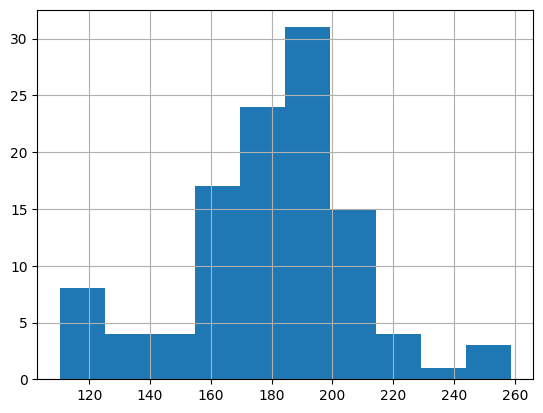

In [15]:
t1['observed'].hist(grid=True );

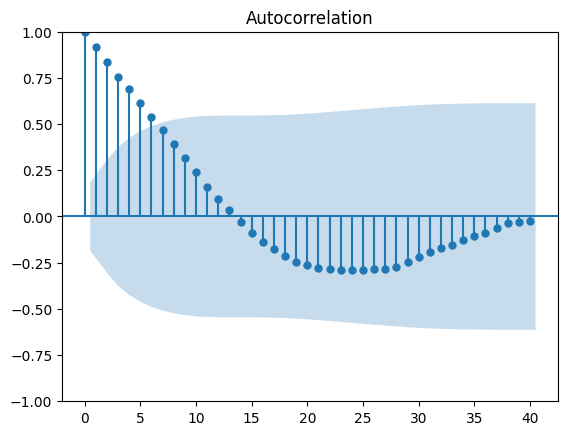

In [16]:
#ACF + PAC
import statsmodels.api as sm_api

sm_api.graphics.tsa.plot_acf(t1['observed'].values, lags = 40);

C:\Users\sgrya\anaconda3\envs\myts\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


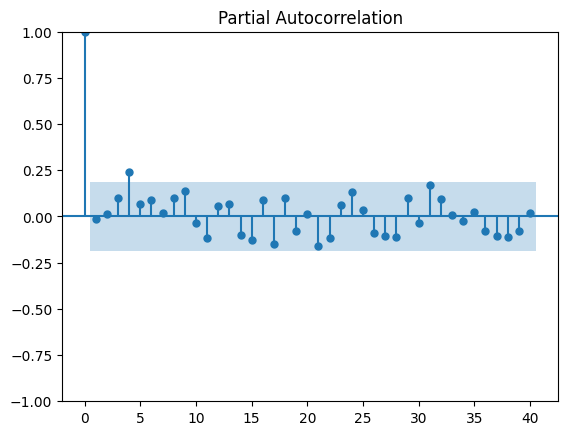

In [17]:
sm_api.graphics.tsa.plot_pacf(t1['diff'].values, lags = 40)
#t1['diff'].values.squeeze
plt.show();

## Moving average

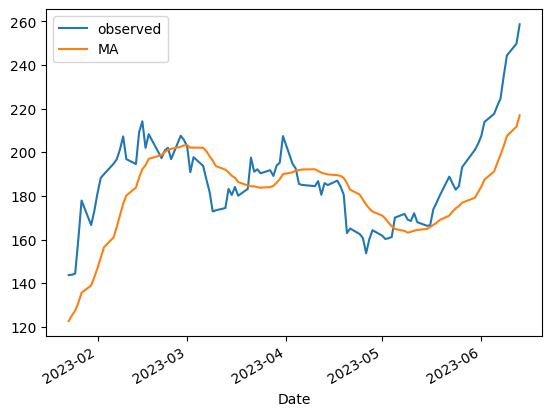

In [18]:
x1 = tesla_df.copy()
x1['MA'] = x1['observed'].rolling(window=14).mean()
x1 = x1.dropna(axis=0)

x1[['observed','MA']].plot();

# Average of last 2 

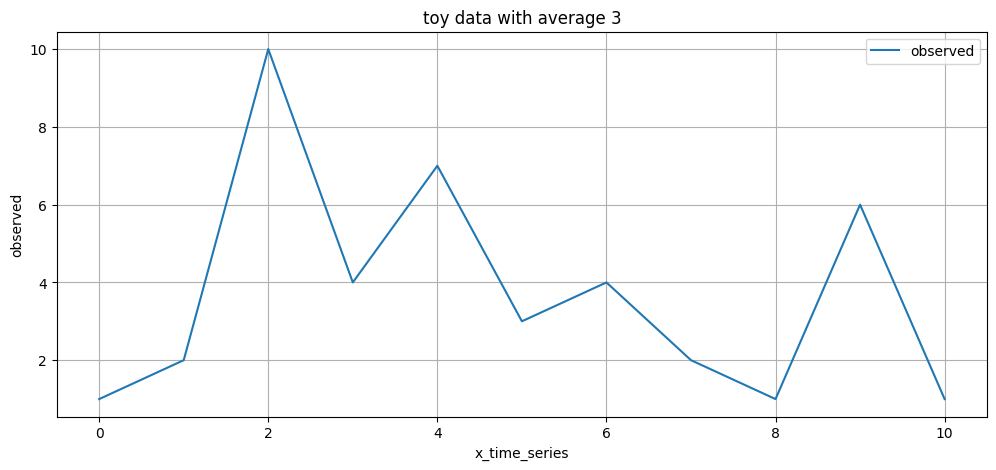

In [100]:
toy_data = {'observed':[1,2,10,4,7,3,4,2,1,6,1]}
toy_df = pd.DataFrame(toy_data)
avg_declared = 3
toy_df.plot(grid=True, title='toy data with average {}'.format(avg_declared), 
            xlabel='x_time_series', ylabel='observed', figsize=(12,5));

In [101]:
toy_df2 = toy_df.copy()
col_name_ = 'predicted_av_{}'.format(avg_declared)
toy_df2[col_name_] = (toy_df2['observed'].cumsum().shift(1)-toy_df2['observed'].cumsum().shift(1+avg_declared))/avg_declared

In [102]:
toy_df2

,observed,predicted_av_3
0,1,NaN
1,2,NaN
2,10,NaN
3,4,NaN
4,7,5.3333
5,3,7.0000
6,4,4.6667
7,2,4.6667
8,1,3.0000
9,6,2.3333


In [104]:
#what on earth is he trying to do? how come so messy? 
toy_data = {'observed':[1,2,10,4,7,3,4,2,1,6,1]}
toy = pd.DataFrame(toy_data)
toy['cumsum'] = toy['observed'].cumsum()
toy['shift_1'] =toy['observed'].cumsum().shift(1)
toy['shift_4'] =toy['observed'].cumsum().shift(4)
toy['last_3'] = (toy['observed'].cumsum().shift(1)-
                 toy['observed'].cumsum().shift(4))
toy['predicted_av_3'] = (toy['observed'].cumsum().shift(1)-
                         toy['observed'].cumsum().shift(4))/3

toy

,observed,cumsum,shift_1,shift_4,last_3,predicted_av_3
0,1,1,NaN,NaN,NaN,NaN
1,2,3,1.0000,NaN,NaN,NaN
2,10,13,3.0000,NaN,NaN,NaN
3,4,17,13.0000,NaN,NaN,NaN
4,7,24,17.0000,1.0000,16.0000,5.3333
5,3,27,24.0000,3.0000,21.0000,7.0000
6,4,31,27.0000,13.0000,14.0000,4.6667
7,2,33,31.0000,17.0000,14.0000,4.6667
8,1,34,33.0000,24.0000,9.0000,3.0000
9,6,40,34.0000,27.0000,7.0000,2.3333


### semula with my version

In [105]:
# def predict_average(df, col_name,p): 
#     new_col_name_ = 'predicted_av_{}'.format(p)
#     df[new_col_name_] = (df[col_name].cumsum().shift(1)
#                          -df[col_name].cumsum().shift(1+p))/p
#     return(df)

In [106]:
#use this 
def predict_average(df, col_name,p): 
    new_col_name_ = 'predicted_av_{}'.format(p)
    df[new_col_name_] = df[col_name].shift(1).rolling(window=p).mean()
    df.dropna(axis=0, inplace=True)
    return(df)

In [107]:
df_ = predict_average(toy_df,'observed', 3)

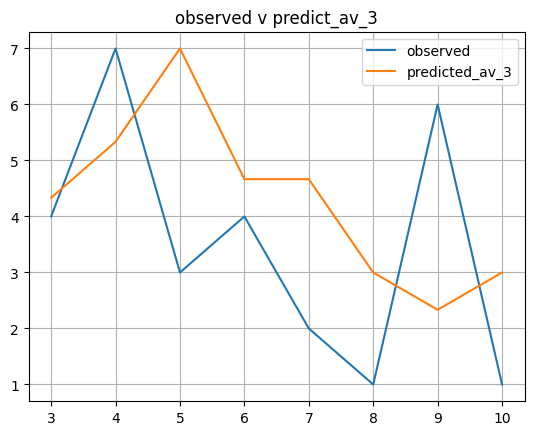

In [109]:
df_.plot(grid=True, title = 'observed v predict_av_3');

In [115]:
t_df2 =  tesla_df.copy()
avg_declared_ = 3
t22 = predict_average(t_df2,'observed',avg_declared_)

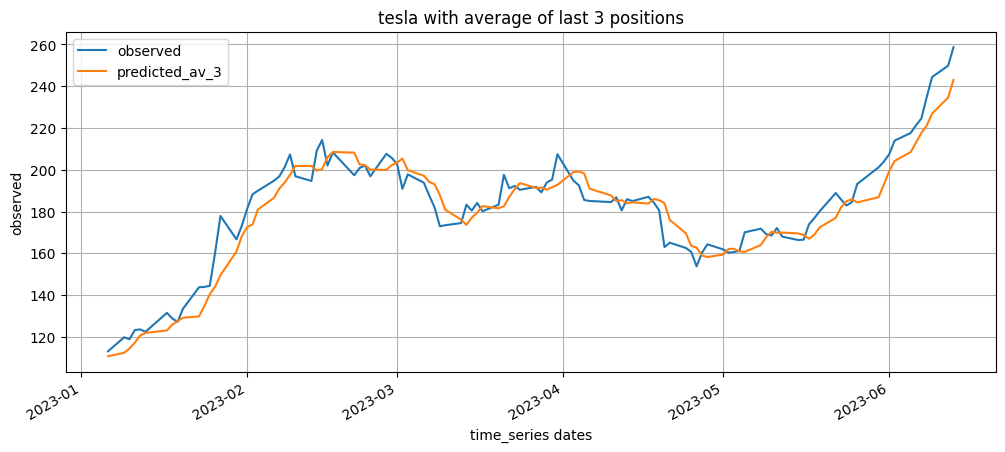

In [118]:
t22.plot(grid=True, title='tesla with average of last {} positions'.format(avg_declared_), 
            xlabel='time_series dates', ylabel='observed', figsize=(12,5));

## Predict with average

In [38]:
def predict_average (df, col_name, p):
    column_new_name = 'predicted_av_{}'.format(p)
    df[column_new_name] = df[col_name].shift(1).rolling(window=p).mean()
    df.dropna(axis=0, inplace=True)
    return(df)

In [39]:
t_df1 = tesla_df.copy()
xx2 = predict_average(t_df1,'observed', 3 )

In [47]:
t_df1.head(3)['observed'].mean()

117.22666422526042

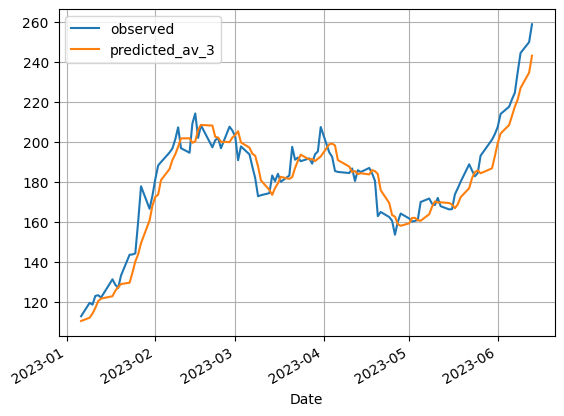

In [50]:
xx2.plot(grid=True); 

## Difference Averages - 12 pages

In [22]:
def difference_averages( df, num_to_average):
    df['diff'] = df['observed'].diff(1)
    df = df.dropna(axis=0).astype(float).reset_index(drop=True)
    df['pred_of_diff'] = df['diff'].shift(1).rolling(window = num_to_average).mean()
    df['pred'] = (df['observed'].shift() + df['pred_of_diff'])
    #return(df)
    return(df[['observed','pred']].dropna(axis=0).copy())

In [23]:
t_df =  tesla_df.copy()
t11 = difference_averages(t_df,5)

In [24]:
(113.06 + 119.77)

232.82999999999998

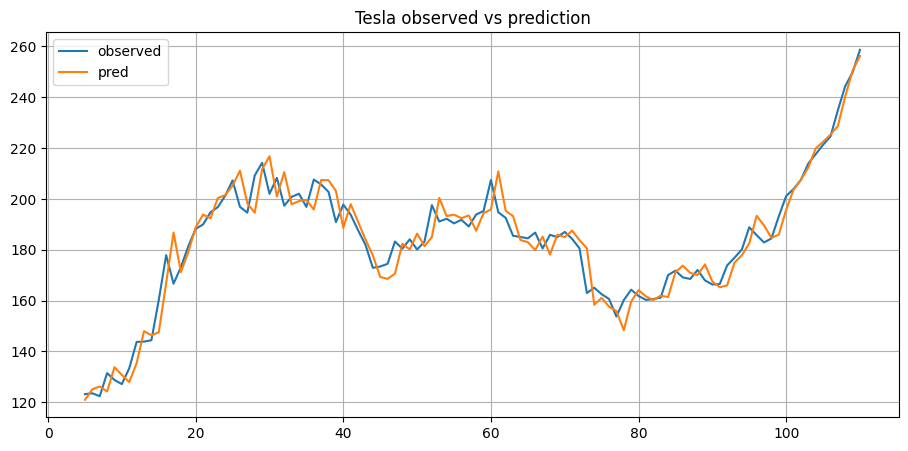

In [25]:
t11.plot( grid=True, figsize= (11,5))
plt.title('Tesla observed vs prediction'); 

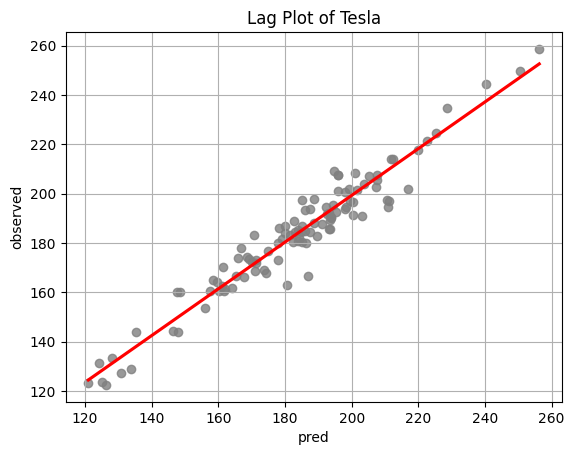

In [26]:
fig, ax = plt.subplots()
ax = sns.regplot(x='pred', y='observed', data=t11, ci=None, scatter_kws=dict(color='0.5'), color = 'r' )
#ax.set_aspect('equal')
ax.set_title('Lag Plot of Tesla')
plt.grid(); 

# Resample

In [27]:
d1 = tesla_df.reset_index(level=0).resample('M', on ='Date').mean()
d1

,observed
Date,
2023-01-31 00:00:00-05:00,134.20
2023-02-28 00:00:00-05:00,199.78
2023-03-31 00:00:00-04:00,188.52
2023-04-30 00:00:00-04:00,176.96
2023-05-31 00:00:00-04:00,175.80
2023-06-30 00:00:00-04:00,230.31


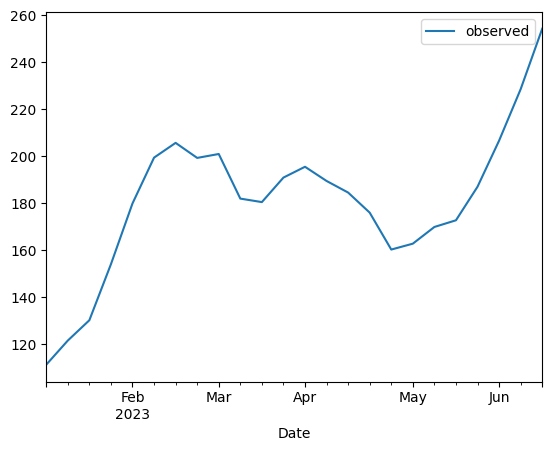

In [28]:
d2 = tesla_df.reset_index(level=0).resample('W', on ='Date').agg({'observed':lambda x : x.mean()})
d2.plot();

In [29]:
d3 = tesla_df.reset_index(level=0).resample('Y', on ='Date').agg({'observed':lambda x : x.sum()})
d3

,observed
Date,
2023-12-31 00:00:00-05:00,"20,118.18"
